# Manipulating and joining data

Using `dplyr`

<h2>Table of content</h2>
<ul>
    <li><a href="#ref1">Filtering subjects based on criteria</a></li>
    <li><a href="#ref2">Select</a></li>
    <li><a href="#ref3">Making new variables</a></li>
    <li><a href="#ref4">Grouping subjects based on criteria</a></li>
    <li><a href="#re5">Producing summary statistics for groups of subjects</a></li>
    <li><a href="#re6">Putting together multiple dataframes with common subjectsv
</ul>

## Filtering subjects based on criteria

In [27]:
library(tidyverse)

How to access rows (subjects) and columns (variables) in a dataframe? For example, we can get the first row of the mpg dataset, like this:

In [28]:
mpg[1,]

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact


This way is fine most of the time, but sometimes we would like to be more precise with filtering examples. So, I'm going to use the package `dplyr` in the `tidyverse` package. Also, I am going to use the flights dataset, here. This dataset is in the `nycflights13` package.

In [29]:
library(nycflights13)
head(flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,minute,time_hour,name.x,name.y,lat,lon,alt,tz,dst,tzone
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,...,<dbl>,<dttm>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2013,1,1,517,515,2,830,819,11,UA,...,15,2013-01-01 05:00:00,United Air Lines Inc.,Newark Liberty Intl,40.69250,-74.16867,18,-5,A,America/New_York
2013,1,1,533,529,4,850,830,20,UA,...,29,2013-01-01 05:00:00,United Air Lines Inc.,La Guardia,40.77725,-73.87261,22,-5,A,America/New_York
2013,1,1,542,540,2,923,850,33,AA,...,40,2013-01-01 05:00:00,American Airlines Inc.,John F Kennedy Intl,40.63975,-73.77893,13,-5,A,America/New_York
2013,1,1,544,545,-1,1004,1022,-18,B6,...,45,2013-01-01 05:00:00,JetBlue Airways,John F Kennedy Intl,40.63975,-73.77893,13,-5,A,America/New_York
2013,1,1,554,600,-6,812,837,-25,DL,...,0,2013-01-01 06:00:00,Delta Air Lines Inc.,La Guardia,40.77725,-73.87261,22,-5,A,America/New_York
2013,1,1,554,558,-4,740,728,12,UA,...,58,2013-01-01 05:00:00,United Air Lines Inc.,Newark Liberty Intl,40.69250,-74.16867,18,-5,A,America/New_York


The first function of `dplyr` I'll use is `filter()`. This lets us filter the subjects that we want, that is, filter the rows: the ***flights***.

Let's start by filtering for just the flights in January (Month 1): 

In [30]:
print(filter(flights, month == 1))

# A tibble: 27,004 x 27
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
# ... with 26,994 more rows,

This gives us 27004 rows (refer to the top of the output).

How about the first day of January?

In [31]:
print(filter(flights, month == 1, day == 1))

# A tibble: 842 x 27
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
# ... with 832 more rows, and 1

### magrittr

As we build up more functions in our data manipulation tool bag, we are going to end up with lots of nested functions. Instead, we can use the `magrittr` or "pipe" symbol `%>%`. Creating a *pipeline* of functions.

The command `%>%` can be read as "then". For example, to print out a filtered result of the first of January, we can rewrite the above command as: 

In [32]:
print(flights %>% filter(month == 1, day == 1))

# A tibble: 842 x 27
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
# ... with 832 more rows, and 1

Now let's print out a filtered result for all American Airlines flights (AA)

In [33]:
print(flights %>% filter(carrier == "AA"))

# A tibble: 32,729 x 27
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      542            540         2      923            850
 2  2013     1     1      558            600        -2      753            745
 3  2013     1     1      559            600        -1      941            910
 4  2013     1     1      606            610        -4      858            910
 5  2013     1     1      623            610        13      920            915
 6  2013     1     1      628            630        -2     1137           1140
 7  2013     1     1      629            630        -1      824            810
 8  2013     1     1      635            635         0     1028            940
 9  2013     1     1      656            700        -4      854            850
10  2013     1     1      656            659        -3      949            959
# ... with 32,719 more rows,

No I'll filter *dep_delay* (departure delay time) by a range of 120 to 240 minutes:

In [34]:
print(filter(flights, dep_delay %in% 120:240))

# A tibble: 8,364 x 27
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      957            733       144     1056            853
 2  2013     1     1     1114            900       134     1447           1222
 3  2013     1     1     1540           1338       122     2020           1825
 4  2013     1     1     1856           1645       131     2212           2005
 5  2013     1     1     1934           1725       129     2126           1855
 6  2013     1     1     1938           1703       155     2109           1823
 7  2013     1     1     1942           1705       157     2124           1830
 8  2013     1     1     2006           1630       216     2230           1848
 9  2013     1     1     2009           1808       121     2145           1942
10  2013     1     1     2221           2000       141     2331           2124
# ... with 8,354 more rows, a

How many records(flights) in the data.frame have a departure delay time in a range of 120 to 240 for the carrier AA?

In [35]:
flights %>% filter(carrier == "AA", dep_delay %in% 120:240) %>% nrow()

[1] 620

What proportion of records in the data.frame for the carrier AA as that departure delay time range?

In [36]:
n1 = flights %>% filter(carrier == "AA", dep_delay %in% 120:240) %>% nrow()
round(n1/nrow(population),3)

[1] 0.153

## Select

The `ncyflights13` dataset is too wide to fit onto the screen. In all the examples of filtering above we couldn’t even see all of the variables – there were always 12 columns which didn’t fit on the screen. It’d be good if we could make our dataframe a bit narrower, so that we can fit the information we’re interested in (and nothing else) onto the screen. This is what select does – it’s essentially a filter, but for columns rather than rows.

So let’s say I was just interested in departure times and arrival times for all American Airways flights on the 1st of January, then I could just add to our filter example from before:

In [37]:
print(flights %>% 
        filter(carrier == "AA", month == 1, day == 1) %>% 
        select(flight, dep_time, arr_time))

# A tibble: 94 x 3
   flight dep_time arr_time
    <int>    <int>    <int>
 1   1141      542      923
 2    301      558      753
 3    707      559      941
 4   1895      606      858
 5   1837      623      920
 6    413      628     1137
 7    303      629      824
 8    711      635     1028
 9    305      656      854
10   1815      656      949
# ... with 84 more rows


We can get fancy with select: if I wanted to grab just the variables from flights that have something to do with “time”, then I could use the contains command:

In [38]:
print(flights %>% select(contains("time")))

# A tibble: 336,776 x 6
   dep_time sched_dep_time arr_time sched_arr_time air_time time_hour          
      <int>          <int>    <int>          <int>    <dbl> <dttm>             
 1      517            515      830            819      227 2013-01-01 05:00:00
 2      533            529      850            830      227 2013-01-01 05:00:00
 3      542            540      923            850      160 2013-01-01 05:00:00
 4      544            545     1004           1022      183 2013-01-01 05:00:00
 5      554            600      812            837      116 2013-01-01 06:00:00
 6      554            558      740            728      150 2013-01-01 05:00:00
 7      555            600      913            854      158 2013-01-01 06:00:00
 8      557            600      709            723       53 2013-01-01 06:00:00
 9      557            600      838            846      140 2013-01-01 06:00:00
10      558            600      753            745      138 2013-01-01 06:00:00
# ... with 336,7

In [39]:
print(select(flights, year:day))

# A tibble: 336,776 x 3
    year month   day
   <int> <int> <int>
 1  2013     1     1
 2  2013     1     1
 3  2013     1     1
 4  2013     1     1
 5  2013     1     1
 6  2013     1     1
 7  2013     1     1
 8  2013     1     1
 9  2013     1     1
10  2013     1     1
# ... with 336,766 more rows


Selecting all columns in the `flights` data.frame that contain double type variables. 

In [40]:
print(select_if(flights, is.double))

# A tibble: 336,776 x 11
   dep_delay arr_delay air_time distance  hour minute time_hour             lat
       <dbl>     <dbl>    <dbl>    <dbl> <dbl>  <dbl> <dttm>              <dbl>
 1         2        11      227     1400     5     15 2013-01-01 05:00:00  40.7
 2         4        20      227     1416     5     29 2013-01-01 05:00:00  40.8
 3         2        33      160     1089     5     40 2013-01-01 05:00:00  40.6
 4        -1       -18      183     1576     5     45 2013-01-01 05:00:00  40.6
 5        -6       -25      116      762     6      0 2013-01-01 06:00:00  40.8
 6        -4        12      150      719     5     58 2013-01-01 05:00:00  40.7
 7        -5        19      158     1065     6      0 2013-01-01 06:00:00  40.7
 8        -3       -14       53      229     6      0 2013-01-01 06:00:00  40.8
 9        -3        -8      140      944     6      0 2013-01-01 06:00:00  40.6
10        -2         8      138      733     6      0 2013-01-01 06:00:00  40.8
# ... with 336,

## Making new variables

What if we wanted to add new columns, in the dataset `flights`? 

We have the departure delay `dep_delay`, which is the difference between the scheduled departure time (`sched_dep_time`) and the departure time (`dep_time`); let's assume that we do not have that and we would like to calculate it. We can do that with:

In [41]:
print(flights %>% mutate(delay = dep_time - sched_dep_time))

# A tibble: 336,776 x 28
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
# ... with 336,766 more row

If we want to add the calculated column into the dataset:

## Grouping subjects based on criteria

We can now do something quite powerful like clump variables together into groups, and then summarise these groups.

I have an hypothesis about flight delays in New York City: I reckon they increase in winter. Due to snow, ice, weather reasons in general. I suspect that in the winter months, the delays in December, January, February, are worse than in the summer months. To investigate this, we'll need to group flights by month, which can be done like this: 

In [42]:
by_month <- group_by(flights,month)
print(by_month)

# A tibble: 336,776 x 27
# Groups:   month [12]
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
# ..

This data frame is the same as the original, apart from the second line: `Groups: month [12]`. That tells me that a group has been created for each month, but to explore this further, we'll have to summarise and that's in the next section.

About `group_by`:

- We can group by multiple variables: `by_day <- group_by(flights,year,month,day)` will create a dataframe with 365 groups for each day of the year, and
- We can ungroup a grouped dataframe using, `ungroup()`. That'll be handy in the next section.


## Producing summary statistics for groups of subjects

To test the hypothesis about flight delays in winter, I will need to create a summary statistic about delays for each month. We can do it by calculating the mean flight departure delay for each calendar month like this:

In [43]:
summarise(by_month, delay = mean(dep_delay, na.rm = TRUE))

month,delay
<int>,<dbl>
1,10.036665
2,10.816843
3,13.227076
4,13.938038
5,12.986859
6,20.846332
7,21.727787
8,12.611040
9,6.722476


This has takenthe grouped dataframe `by_month`, and for each group has computed the mean of the values in the `dep_delay` column for that group. The `na.rm = TRUE` argument tells the mean function to remove (`rm` in unix-talk) all values that are not available `NA`. Basically, some rows in this dataframe do not have an entry in the `dep_delay column`, so R puts the symbol `NA` there instead. Trying to calculate the mean with *NA*'s doesn't work.

But looking at the results, I don't think the hypothesis was correct. December has slightly worse delays than the preceeding months, but January and February really weren't so bad, and by far the worst months are June and July. We can make a nice plot of the trends over the entire year using `ggplot`. We'll group by day this time instead of month:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


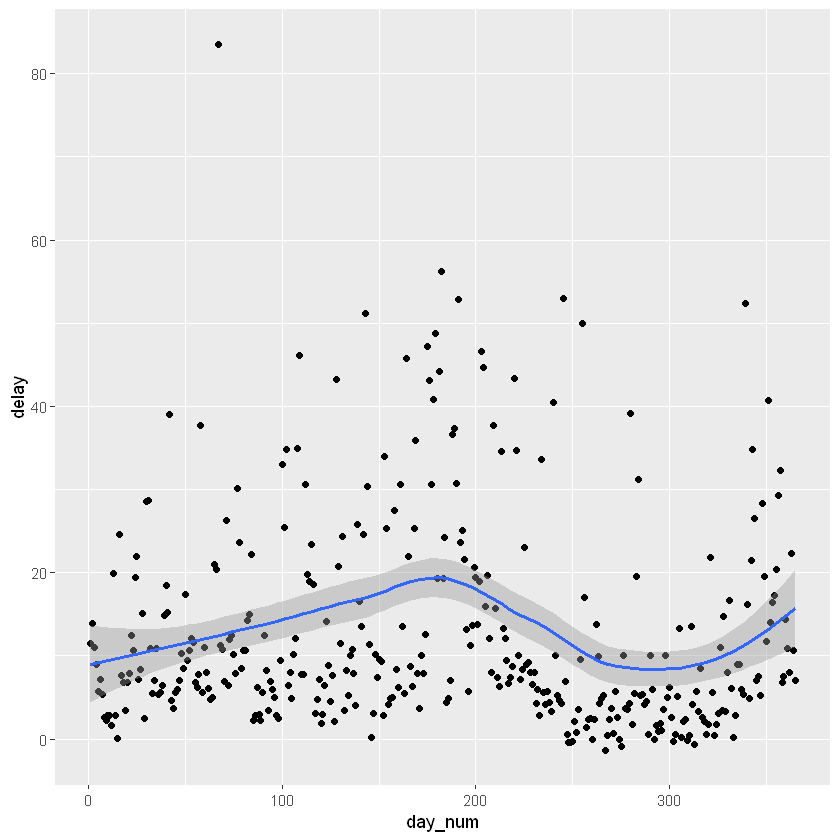

In [44]:
by_day <- group_by(flights,year,month,day)
summarise(by_day, delay = mean(dep_delay, na.rm = TRUE)) %>%
ungroup() %>% 
mutate(day_num = seq_along(delay)) %>% 
ggplot(aes(day_num,delay)) + 
geom_point() + 
geom_smooth()

I've added a slightly tricky intermediate step here to create a column `day_num` counting the days of the year: `ungroup() %>% mutate(day_num = seq_along(delay))` ungroups `by_day`, and then creates a sequence along the column delay - essentially counting the row numbers.

I think that delays increases along with number passengers. The more the passengers that are flying, the more delays we have. Guided by this exploration, June, July, and December would be the busiest months for flying, and that there are longer delays when there are more flights. A simple modification to our `summarise` command will allow us to explore this relationship:

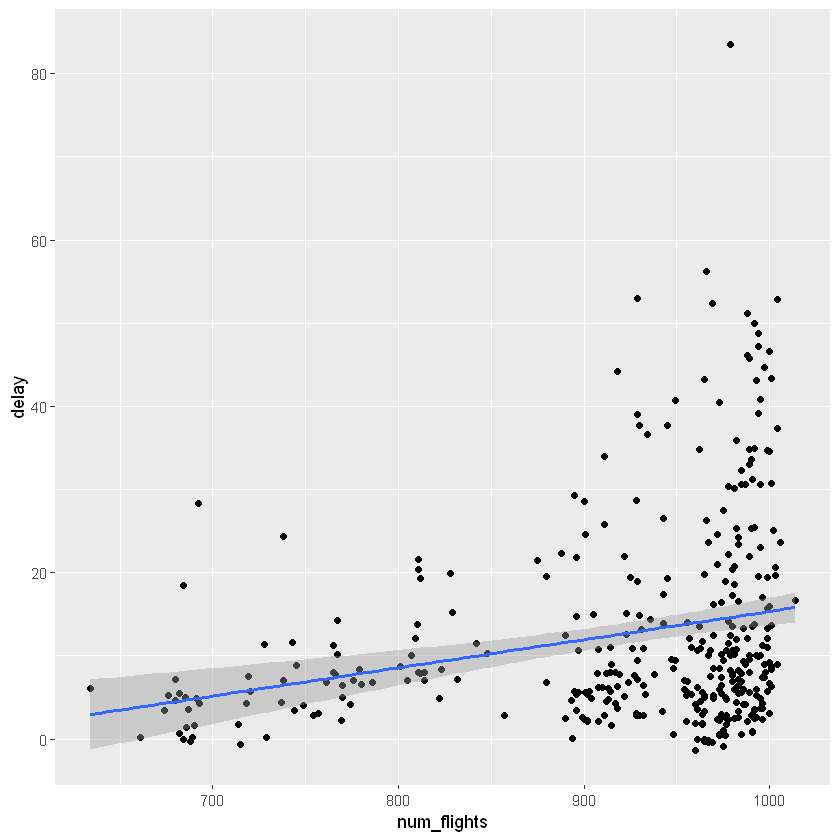

In [45]:
summarise(by_day, delay = mean(dep_delay, na.rm = TRUE), num_flights = n()) %>%
ggplot(aes(num_flights,delay)) + 
geom_point() + 
geom_smooth(method='lm') #method='lm' to visualize a linear relationship

The `num_flights = n()` bit produces a second summary statistic for each group, which is just the number of items in that group. Note that I don't need to index days of the year now, so I can lose the `ungroup` bit.

It looks like there's some relationship between number of flights and delays, but it's not particularly strong. Again, some more investigation is needed.

## Putting together multiple dataframes with common subjects

Now let's look at the dataframe `airlines` in the `nycflights13` package:

In [46]:
airlines

carrier,name
<chr>,<chr>
9E,Endeavor Air Inc.
AA,American Airlines Inc.
AS,Alaska Airlines Inc.
B6,JetBlue Airways
DL,Delta Air Lines Inc.
EV,ExpressJet Airlines Inc.
F9,Frontier Airlines Inc.
FL,AirTran Airways Corporation
HA,Hawaiian Airlines Inc.


So there are two dataframes:

- `flights` - each row is a flight, with a variable `carrier`, which gives the abbreviation for the carrier of each flight
- `airlines` - each row is an airline company, which also has a variable called `carrier`.

I would like you to add the full names to the flights dataset and then saving it.

In [47]:
flights <- left_join(flights, airlines, by = "carrier")

I've made a ***left join*** of the dataset airlines into flights by the common feature `carrier`. 

In [48]:
print(flights %>% select(year, month, day, carrier, name))

# A tibble: 336,776 x 5
    year month   day carrier name                    
   <int> <int> <int> <chr>   <chr>                   
 1  2013     1     1 UA      United Air Lines Inc.   
 2  2013     1     1 UA      United Air Lines Inc.   
 3  2013     1     1 AA      American Airlines Inc.  
 4  2013     1     1 B6      JetBlue Airways         
 5  2013     1     1 DL      Delta Air Lines Inc.    
 6  2013     1     1 UA      United Air Lines Inc.   
 7  2013     1     1 B6      JetBlue Airways         
 8  2013     1     1 EV      ExpressJet Airlines Inc.
 9  2013     1     1 B6      JetBlue Airways         
10  2013     1     1 AA      American Airlines Inc.  
# ... with 336,766 more rows


I've used `select` to show only come features and check that we've added the extended name of the carrier.

We can do the same with `airports` dataset:

In [49]:
print(airports)

# A tibble: 1,458 x 8
   faa   name                       lat    lon   alt    tz dst   tzone          
   <chr> <chr>                    <dbl>  <dbl> <dbl> <dbl> <chr> <chr>          
 1 04G   Lansdowne Airport         41.1  -80.6  1044    -5 A     America/New_Yo~
 2 06A   Moton Field Municipal A~  32.5  -85.7   264    -6 A     America/Chicago
 3 06C   Schaumburg Regional       42.0  -88.1   801    -6 A     America/Chicago
 4 06N   Randall Airport           41.4  -74.4   523    -5 A     America/New_Yo~
 5 09J   Jekyll Island Airport     31.1  -81.4    11    -5 A     America/New_Yo~
 6 0A9   Elizabethton Municipal ~  36.4  -82.2  1593    -5 A     America/New_Yo~
 7 0G6   Williams County Airport   41.5  -84.5   730    -5 A     America/New_Yo~
 8 0G7   Finger Lakes Regional A~  42.9  -76.8   492    -5 A     America/New_Yo~
 9 0P2   Shoestring Aviation Air~  39.8  -76.6  1000    -5 U     America/New_Yo~
10 0S9   Jefferson County Intl     48.1 -123.    108    -8 A     America/Los_An~
# ... 

In [50]:
print(flights %>% select(year, month, day, carrier, origin))

# A tibble: 336,776 x 5
    year month   day carrier origin
   <int> <int> <int> <chr>   <chr> 
 1  2013     1     1 UA      EWR   
 2  2013     1     1 UA      LGA   
 3  2013     1     1 AA      JFK   
 4  2013     1     1 B6      JFK   
 5  2013     1     1 DL      LGA   
 6  2013     1     1 UA      EWR   
 7  2013     1     1 B6      EWR   
 8  2013     1     1 EV      LGA   
 9  2013     1     1 B6      JFK   
10  2013     1     1 AA      LGA   
# ... with 336,766 more rows


And join by `origin` tht is the same as `faa` for the `airports` dataset.

In [51]:
flights <- flights %>% left_join(airports, by = c("origin" = "faa")) 

In [52]:
print(flights %>% select(year, month, day, carrier, origin, name.y))

# A tibble: 336,776 x 6
    year month   day carrier origin name.y             
   <int> <int> <int> <chr>   <chr>  <chr>              
 1  2013     1     1 UA      EWR    Newark Liberty Intl
 2  2013     1     1 UA      LGA    La Guardia         
 3  2013     1     1 AA      JFK    John F Kennedy Intl
 4  2013     1     1 B6      JFK    John F Kennedy Intl
 5  2013     1     1 DL      LGA    La Guardia         
 6  2013     1     1 UA      EWR    Newark Liberty Intl
 7  2013     1     1 B6      EWR    Newark Liberty Intl
 8  2013     1     1 EV      LGA    La Guardia         
 9  2013     1     1 B6      JFK    John F Kennedy Intl
10  2013     1     1 AA      LGA    La Guardia         
# ... with 336,766 more rows
